# TAM Analysis

In [ ]:
#!pip install pandas_profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
import missingno as msno
import ydata_profiling

import warnings
warnings.filterwarnings("ignore")


## Get the data

In [ ]:
from google.colab import files
upload = files.upload()

Saving UCPATH-TAM-012-Filled_2022.xlsx to UCPATH-TAM-012-Filled_2022 (1).xlsx


In [ ]:
df = pd.read_excel('UCPATH-TAM-012-Filled_2022.xlsx', sheet_name = 'Detail')
df.head()

,Job Opening ID,Job Opening Post Title,Job Opening Status Description,Job Opening Business Unit,Level 3 Department,Level 3 Department Description,Department ID,Department Description,Recruiter Name,Job Opening Position,...,Internal Job Posting Close Date,Position Standard Hours,Job Opening Employee Class Description,Position Union Code,Job Opening Target,Days in Recruitment,Months in Recruitment,Manager Name,Department Director Name,Department Chief/Chair Name
0,36804,General Accountant III,110 Filled/Closed,IRCMP,IR9002,Div of Finance/ Administration,IR8009,Accounting & Fiscal Services,"Grant,Kimberly Sharisse",40285810,...,2022-10-10,40.0,Staff: Career,99,1,132,4,"Schweikert,Lanfeng Liu",NaN,NaN
1,34987,"Nursing Assistant- Surgery Pre Op- F/T, Day Shift",110 Filled/Closed,IRMED,MEDC,Medical Center,427023,Surgery Pre Op,"Haase,Cinthya Meza",40894287,...,2022-06-26,36.0,Staff: Career,EX,1,119,3,"Nair,Rema","Rosalsky,Mara","Baldwin,Brooke"
2,44003,"Senior Custodian, MC- Environmental Services- ...",110 Filled/Closed,IRMED,MEDC,Medical Center,428460,Environmental Services,"Le,Tri Ngoc",40308324,...,NaT,40.0,Staff: Career,SX,1,78,2,"Raya,Michelle","Payne,Kim Denise","Shinagawa,Nathan Ikkyu Han Il"
3,39042,Principal EEG Technologist - Neuro Diagnostics...,110 Filled/Closed,IRMED,MEDC,Medical Center,427130,Neuro Diagnostics,"De Leon,Kristy Lynn",40313870,...,2022-08-03,40.0,Staff: Career,EX,1,169,5,"Hashemi,Maryam","Pham,Bich Thuy T","Shinagawa,Nathan Ikkyu Han Il"
4,38987,Clinical Nurse II - Operating Room - Full Time...,110 Filled/Closed,IRMED,MEDC,Medical Center,427021,Operating Room,"Thornton,Rachel",40912245,...,NaT,36.0,Staff: Career,NX,1,101,3,"Talbot,Susan Dee","Rosalsky,Mara","Baldwin,Brooke"


## Data Preprocessing

In [ ]:
# Data shaoe
df.shape

(2696, 30)

In [ ]:
# check for missing values
df.isnull().sum()

Job Opening ID                              0
Job Opening Post Title                      0
Job Opening Status Description              0
Job Opening Business Unit                   0
Level 3 Department                          0
Level 3 Department Description              0
Department ID                               0
Department Description                      0
Recruiter Name                              0
Job Opening Position                        0
Job Code                                    0
Job Code Description                        0
Job Code Class Indicator                    0
Job Code Class Indicator Description        0
Position Salary Admin Plan                  0
Grade                                       0
Job Opening Open Date                       0
Job Opening Close Date                      0
Job Opening Authorization Date            603
External Job Posting Close Date           528
Internal Job Posting Close Date           528
Position Standard Hours           

In [ ]:
# check for data types
df.dtypes

Job Opening ID                                     int64
Job Opening Post Title                            object
Job Opening Status Description                    object
Job Opening Business Unit                         object
Level 3 Department                                object
Level 3 Department Description                    object
Department ID                                     object
Department Description                            object
Recruiter Name                                    object
Job Opening Position                               int64
Job Code                                           int64
Job Code Description                              object
Job Code Class Indicator                           int64
Job Code Class Indicator Description              object
Position Salary Admin Plan                        object
Grade                                             object
Job Opening Open Date                     datetime64[ns]
Job Opening Close Date         

In [ ]:
# convert categorical variables into factors
categorical_variables = [
    "Job Opening ID",
    "Job Opening Post Title",
    "Job Opening Status Description",
    "Job Opening Business Unit",
    "Level 3 Department",
    "Level 3 Department Description",
    "Department ID",
    "Department Description",
    "Recruiter Name",
    "Job Opening Position",
    "Job Code",
    "Job Code Description",
    "Job Code Class Indicator",
    "Job Code Class Indicator Description",
    "Position Salary Admin Plan",
    "Job Opening Employee Class Description",
    "Position Union Code",
    "Job Opening Target",
    "Manager Name",
    "Department Director Name",
    "Department Chief/Chair Name"
]

# Convert variables to categorical, excluding missing observations
df[categorical_variables] = df[categorical_variables].astype("category").apply(lambda x: x.cat.remove_unused_categories())


## Analysis and EDA

### Summary statistics

In [ ]:
numerical_variables = ["Days in Recruitment", "Months in Recruitment"]

# Calculate summary statistics
df[numerical_variables].describe().T


,count,mean,std,min,25%,50%,75%,max
Days in Recruitment,2696.0,87.959199,54.437278,0.0,50.0,76.0,111.0,363.0
Months in Recruitment,2696.0,2.406899,1.806259,0.0,1.0,2.0,3.0,11.0


#### Days in Recruitment:

* The average recruitment duration is approximately 87.96 days, indicating that the typical recruitment process lasts for around three months.

* The standard deviation of 54.44 days suggests that there is variability in recruitment durations, with some processes being significantly shorter or longer than the average.

* The minimum duration of 0 days implies that there are cases where recruitments are completed on the same day they are opened, possibly indicating quick or urgent hiring processes.

* The maximum duration of 363 days suggests that some recruitments take more than a year to complete, indicating potential inefficiencies or delays in the hiring process.

* The quartiles (25th, 50th, and 75th percentiles) provide insights into the distribution of recruitment durations, indicating that most recruitments are completed within 111 days or less.

#### Months in Recruitment:

* The average recruitment duration is approximately 2.41 months, suggesting that most hiring processes are completed within a few months.

* The standard deviation of 1.81 months implies that there is variability in recruitment durations, with some processes being significantly shorter or longer than the average.

* The minimum duration of 0 months indicates that there are cases where recruitments are completed within the same month they are opened, suggesting quick or efficient hiring processes.

* The maximum duration of 11 months implies that some recruitments take almost a year to complete, which may be an area for improvement in terms of efficiency and time management.

* The quartiles (25th, 50th, and 75th percentiles) provide insights into the distribution of recruitment durations, indicating that most recruitments are completed within 3 months or less.

The key insights from the above interpretations on days and months in recruitment provide a high-level understanding of the recruitment process and highlight potential areas of improvement, such as reducing the variability and duration of the recruitment process, optimizing efficiency to minimize delays, and focusing on reducing the number of lengthy recruitment processes. Additionally, the insights can serve as a baseline for evaluating future improvements and measuring the effectiveness of strategies implemented to address any identified issues.


### Top Recruiters with the number of requisitions

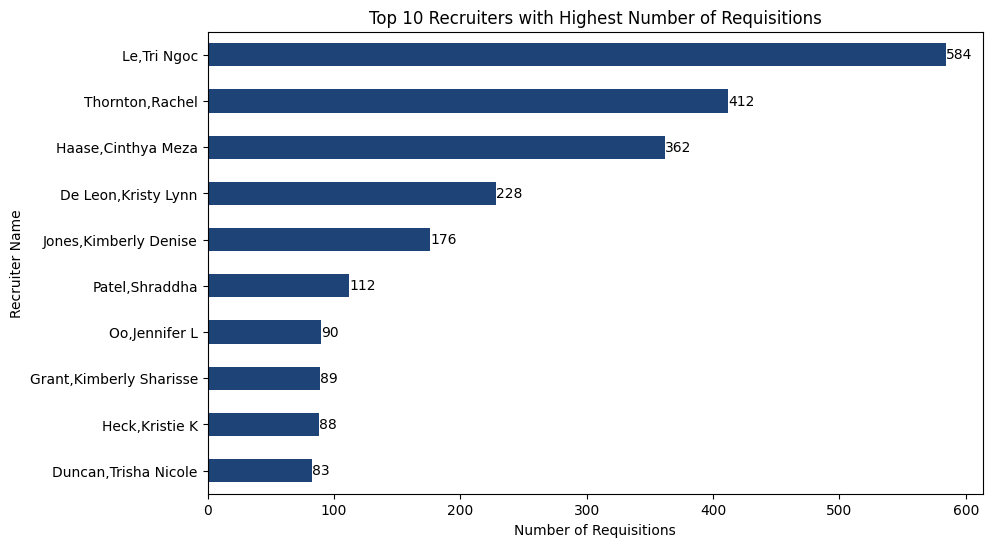

In [ ]:
# Count the number of job openings for each recruiter
recruiter_counts = df['Recruiter Name'].value_counts()

# Select the top 10 recruiters in ascending order
top_10_recruiters = recruiter_counts.sort_values(ascending=True).tail(10)

# Plotting the horizontal bar chart for top 10 recruiters
plt.figure(figsize=(10, 6))
top_10_recruiters.plot(kind='barh', color='#1E4477')
plt.xlabel('Number of Requisitions')
plt.ylabel('Recruiter Name')

# Add value labels to the bars
for i, count in enumerate(top_10_recruiters):
    plt.text(count, i, str(count), ha='left', va='center')

plt.title('Top 10 Recruiters with Highest Number of Requisitions')
plt.show();


Based on the above plot, it is evident that Ngoc, Rachel, and Haase are the most successful recruiters in the hiring process, as they have accounted for a substantial number of requisitions. Ngoc leads the pack with an impressive count of 584 requisitions, indicating their exceptional performance and effectiveness in sourcing and filling job openings. Rachel follows closely with 412 requisitions, demonstrating their strong contribution to the hiring process. Haase also exhibits noteworthy proficiency with 362 requisitions. These metrics highlight the outstanding performance of Ngoc, Rachel, and Haase as recruiters, showcasing their ability to handle a significant number of requisitions effectively. Their contributions play a crucial role in the overall efficiency and success of the hiring process."

### Top Managers with the number of requisitions

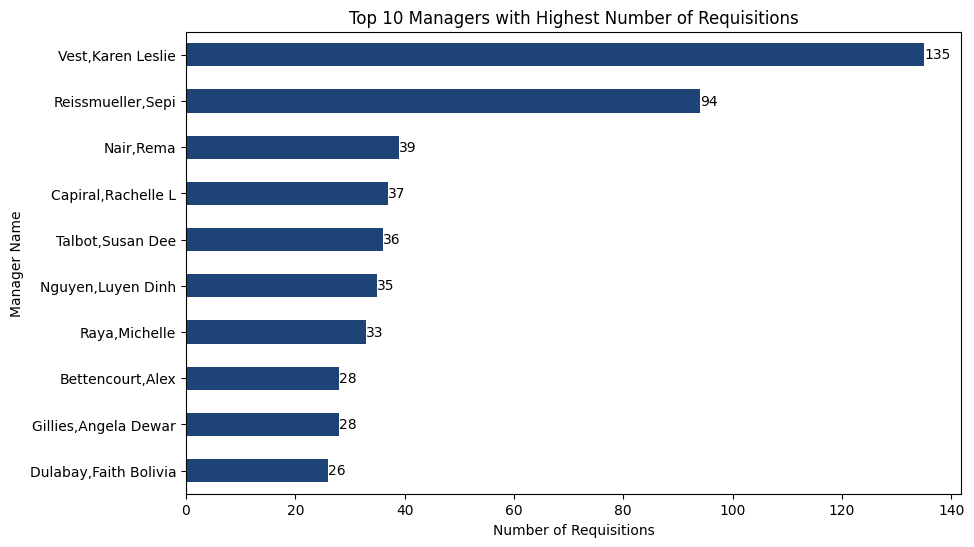

In [ ]:
# Count the number of job openings for each recruiter
recruiter_counts = df['Manager Name'].value_counts()

# Select the top 10 recruiters in ascending order
top_10_recruiters = recruiter_counts.sort_values(ascending=True).tail(10)

# Plotting the horizontal bar chart for top 10 recruiters
plt.figure(figsize=(10, 6))
top_10_recruiters.plot(kind='barh', color='#1E4477')
plt.xlabel('Number of Requisitions')
plt.ylabel('Manager Name')

# Add value labels to the bars
for i, count in enumerate(top_10_recruiters):
    plt.text(count, i, str(count), ha='left', va='center')

plt.title('Top 10 Managers with Highest Number of Requisitions')
plt.show();


From the above plot, it is evident that Karen and Sepi have the highest number of requisitions as managers in the recruitment process. Karen stands out with 135 requisitions, followed by Sepi with 94 requisitions. This observation highlights their substantial involvement and influence in managing job openings and leading the recruitment efforts. Their high requisition counts indicate that Karen and Sepi play crucial roles in the hiring structure, making them key contributors to the recruitment process.

### Top Department chiefs with the number of requisitions

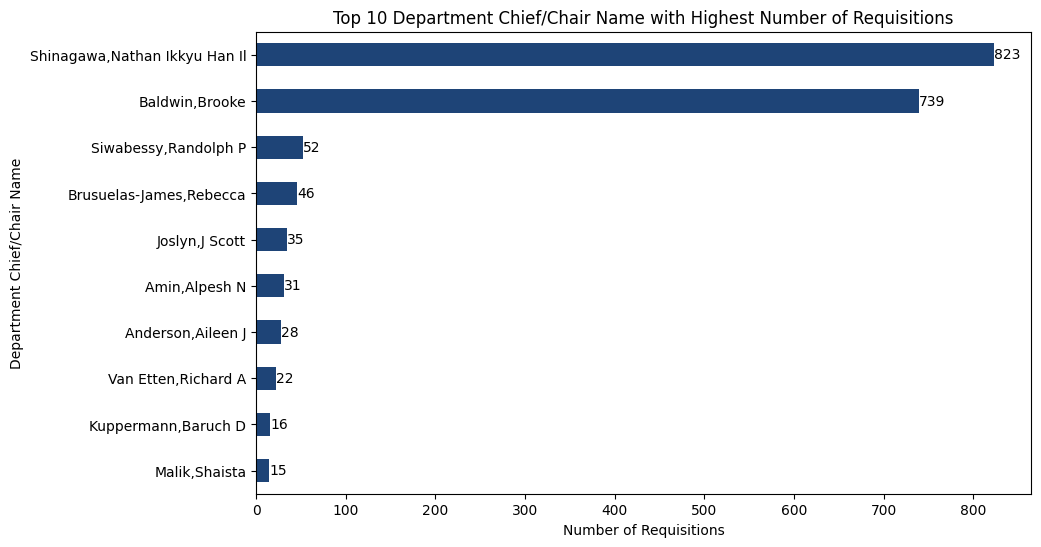

In [ ]:
# Count the number of job openings for each recruiter
recruiter_counts = df['Department Chief/Chair Name'].value_counts()

# Select the top 10 recruiters in ascending order
top_10_recruiters = recruiter_counts.sort_values(ascending=True).tail(10)

# Plotting the horizontal bar chart for top 10 recruiters
plt.figure(figsize=(10, 6))
top_10_recruiters.plot(kind='barh', color='#1E4477')
plt.xlabel('Number of Requisitions')
plt.ylabel('Department Chief/Chair Name')

# Add value labels to the bars
for i, count in enumerate(top_10_recruiters):
    plt.text(count, i, str(count), ha='left', va='center')

plt.title('Top 10 Department Chief/Chair Name with Highest Number of Requisitions')
plt.show();


Based on the bar plot above, it is evident that Shinagawa and Baldwin, as Department Chief/Chairs, have significantly higher involvement in the hiring process compared to other positions. Shinagawa oversaw 823 requisitions, while Baldwin supervised 739 requisitions, indicating their substantial contribution to the hiring structure. These metrics highlight the notable workload and responsibility carried by Shinagawa and Baldwin in managing job openings and recruitment processes.

### Time for Recruitment process

In [ ]:
# The duration between "Job Opening Open Date" and "Job Opening Close Date"
df['Duration'] = df['Job Opening Close Date'] - df['Job Opening Open Date']

# Convert the duration to a numeric value in days
df['Duration'] = df['Duration'].dt.days

# Calculate the average duration
average_duration_rounded = round(df['Duration'].mean(), 2)


# Display the average duration
print("The Average Duration (in days):", average_duration_rounded)

The Average Duration (in days): 87.96


The average duration of job postings is approximately 88 days. This provides insight into the typical length of time job postings remain open before being closed. It helps assess the efficiency of the hiring process and identify areas for improvement. Comparisons with organizational needs and industry benchmarks can provide further context.

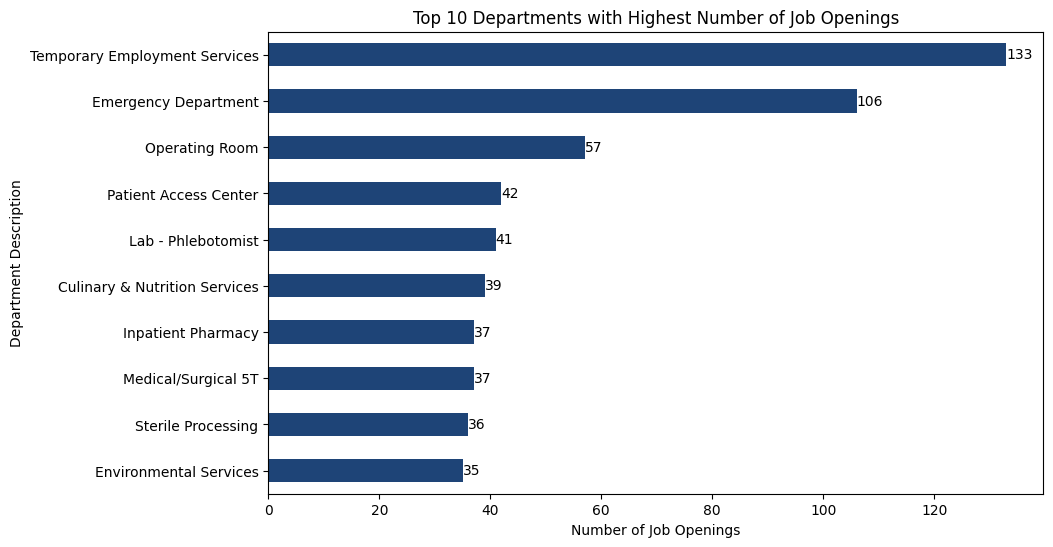

In [ ]:
# Count the number of job openings in each department
department_counts = df['Department Description'].value_counts()

# Select the top 10 departments in ascending order
top_10_departments = department_counts.sort_values(ascending=True).tail(10)

# Plotting the horizontal bar chart for top 10 departments
plt.figure(figsize=(10, 6))
top_10_departments.plot(kind='barh', color = '#1E4477')
plt.xlabel('Number of Job Openings')
plt.ylabel('Department Description')

# Add value labels to the bars
for i, count in enumerate(top_10_departments):
    plt.text(count, i, str(count), ha = 'left', va = 'center')

plt.title('Top 10 Departments with Highest Number of Job Openings')
plt.show();


The following can be interpreted from the above bar plot:

- **Temporary Employment Services**: This department has the highest number of job openings with a count of 133. This indicates that there is a significant demand for temporary employees within the organization.

- **Emergency Department**: The second-highest number of job openings is in the Emergency Department, with a count of 106. This suggests that there is a considerable need for staffing in the emergency department.

- **Operating Room**: The Operating Room department has 57 job openings, indicating a need for personnel in surgical operations. This insight highlights the demand for staffing in the operating room department.

- **Patient Access Center**: The Patient Access Center has 42 job openings, suggesting a need for staff in managing patient admissions and appointments. This insight highlights the demand for staffing in the patient access center.

- **Lab-Phlebotomist**: The Lab-Phlebotomist department has 41 job openings, indicating a need for personnel in laboratory services and phlebotomy. This insight emphasizes the demand for staffing in the lab-phlebotomist department.

Tthe bar plot provides a visual representation of the distribution of job openings across different departments. It allows us to identify departments with the highest demand for personnel and prioritize resource allocation accordingly. The insights derived from the above plot helps us to identify areas where recruitment efforts may need to be focused and can inform decision-making in workforce planning and allocation of resources.

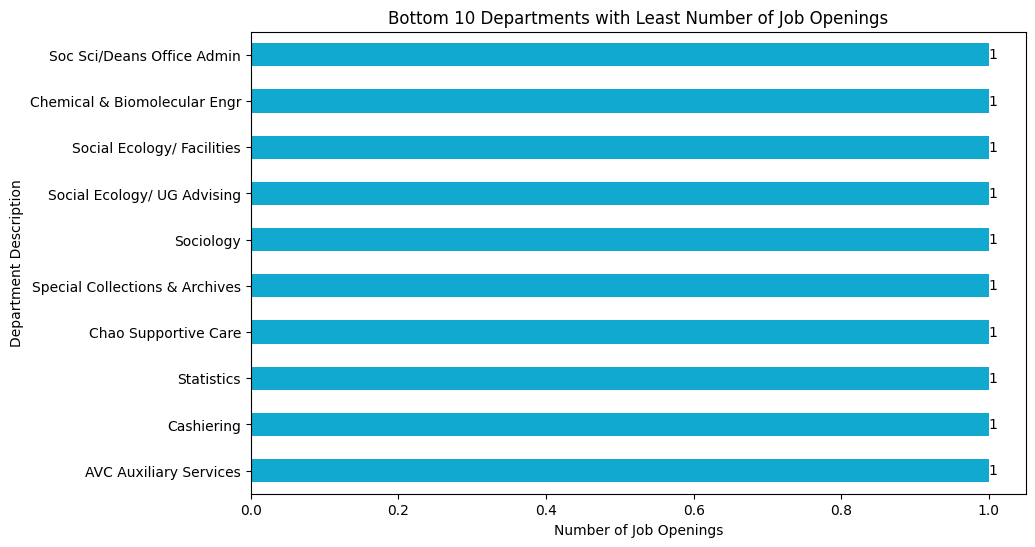

In [ ]:
# Count the number of job openings in each department
department_counts = df['Department Description'].value_counts()

# Select the bottom 10 departments in ascending order
bottom_10_departments = department_counts.sort_values(ascending=True).head(10)

# Plotting the horizontal bar chart for bottom 10 departments
plt.figure(figsize=(10, 6))
bottom_10_departments.plot(kind='barh', color='#12A9D0')
plt.xlabel('Number of Job Openings')
plt.ylabel('Department Description')

# Add value labels to the bars
for i, count in enumerate(bottom_10_departments):
    plt.text(count, i, str(count), ha='left', va='center')

plt.title('Bottom 10 Departments with Least Number of Job Openings')
plt.show()


The bar plot above displays the least occurring job openings in the dataset, where each of these departments has only one job opening. The departments mentioned, such as Soc Sci/Deans Office Admin, Sociology, Statistics, Cashiering, and AVC Auxiliary Services, have the lowest number of job openings among all the departments.

_This information holds significance in the recruitment process as it highlights departments that have a minimal demand for new hires. Understanding the departments with the least job openings can help in several ways:_

- **Resource allocation:** By identifying departments with limited job openings, organizations can allocate their recruitment resources more efficiently. They can focus their efforts on departments with higher job opening numbers and allocate fewer resources to departments with lower job openings.

- **Workforce planning:** Departments with fewer job openings may indicate lower turnover rates or reduced hiring needs. This information can aid in long-term workforce planning, budgeting, and resource allocation for recruitment activities.

- **Talent acquisition strategies:** Recognizing departments with fewer job openings can prompt organizations to explore alternative talent acquisition strategies. They may consider cross-departmental transfers, internal promotions, or talent development programs to fill vacancies or address staffing needs.

- **Performance evaluation:** Analyzing the departments with the least job openings can help in evaluating the effectiveness of current recruitment strategies and assessing the alignment between workforce supply and demand. It provides insights into whether the recruitment process is adequately meeting the needs of different departments.

Understanding the departments with the least job openings provides valuable insights into the recruitment process, allowing organizations to make informed decisions regarding resource allocation, workforce planning, talent acquisition, and performance evaluation._

### Job openings throughout 2022

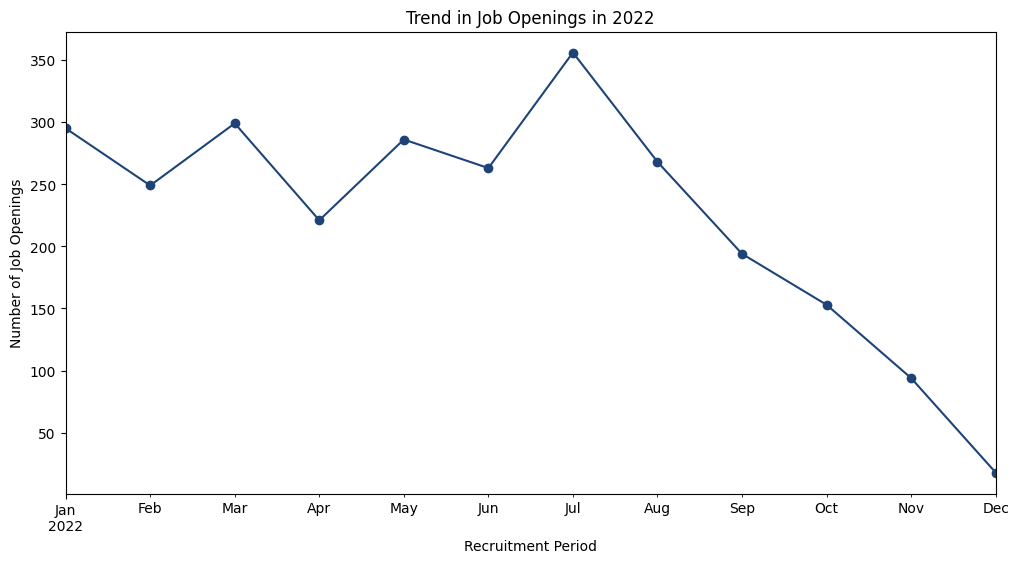

In [ ]:
# Convert the 'Job Opening Open Date' column to datetime
df['Job Opening Open Date'] = pd.to_datetime(df['Job Opening Open Date'])

# Filter the data for one year
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2022-12-31')
df_filtered = df[(df['Job Opening Open Date'] >= start_date) & (df['Job Opening Open Date'] <= end_date)]

# Group the data by month and count the number of job openings
monthly_job_openings = df_filtered.groupby(df_filtered['Job Opening Open Date'].dt.to_period('M')).size()

# Plot the time series of job openings
plt.figure(figsize=(12, 6))
monthly_job_openings.plot(marker='o', linestyle='-', color='#1E4477')
plt.xlabel('Recruitment Period')
plt.ylabel('Number of Job Openings')
plt.title('Trend in Job Openings in 2022')
plt.xticks(rotation=0)
plt.show();


The line chart above shows the trends in job openings throughout 2022. There is an increase in job openings from January to July, reaching a peak in July, followed by a decline towards the end of the year. This information will help the management to understand the hiring patterns and make informed decisions regarding resource allocation and recruitment strategies.

In [ ]:
# Calculate the duration between "Job Opening Open Date" and "Job Opening Close Date"
df['Duration'] = df['Job Opening Close Date'] - df['Job Opening Open Date']

# Convert the duration to a numeric value in days
df['Duration'] = df['Duration'].dt.days

# Calculate the average duration
average_duration = df['Duration'].mean()

# Identify job openings with duration longer than the average
long_duration_jobs = df[df['Duration'] > average_duration]

# Print the number of job openings with long duration
print("Number of job openings with duration longer than average:", len(long_duration_jobs))



Number of job openings with duration longer than average: 1103


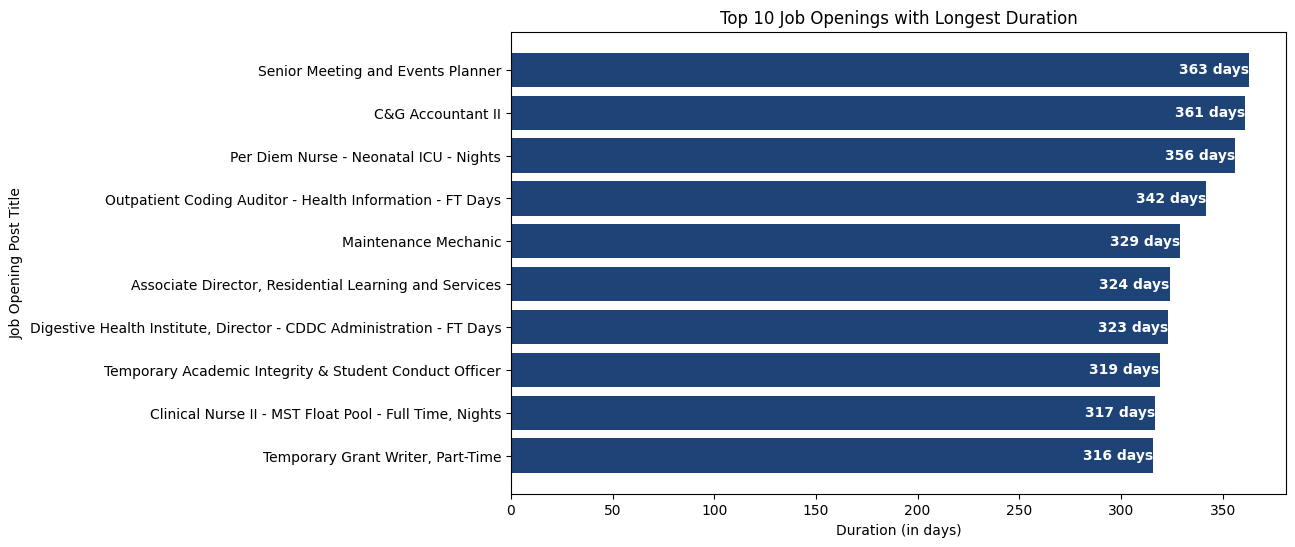

In [ ]:
# Identify the top 10 job openings with the longest duration
top_10_jobs = df.nlargest(10, 'Duration')

# Sort the dataframe by the duration in descending order
top_10_jobs_sorted = top_10_jobs.sort_values('Duration', ascending=True)

# Create a horizontal bar chart for the top 10 job openings
plt.figure(figsize=(10, 6))
bar_colors = '#1E4477'
plt.barh(top_10_jobs_sorted['Job Opening Post Title'], top_10_jobs_sorted['Duration'], color=bar_colors)

# Add the duration values to the bars with bold and white font
for i, duration in enumerate(top_10_jobs_sorted['Duration']):
    plt.text(duration, i, f'{duration} days', ha='right', va='center', color='white', weight='bold')

plt.xlabel('Duration (in days)')
plt.ylabel('Job Opening Post Title')
plt.title('Top 10 Job Openings with Longest Duration')
plt.show();


The bar plot represents the duration it took to fill job openings based on the calculation of the time between the "Job Opening Open Date" and "Job Opening Close Date". By analyzing the plot, we can identify job openings that took significantly longer than the average duration, indicating potential bottlenecks or delays in the recruitment process.

From the plot, we can observe the following job openings that took longer durations compared to the average:

- Senior Meeting and Events Planner: This job opening took 363 days to fill, which is significantly longer than the average duration. This suggests a potential delay in the recruitment process for this position.

- C&G Accountant II: This job opening took 361 days to fill, also exceeding the average duration. It indicates a prolonged recruitment process for this particular position.

- Per Diem Nurse - Neonatal ICU - Nights: The duration to fill this job opening was 356 days, which is considerably longer than the average. This highlights a potential issue or delay in hiring nurses for the Neonatal ICU night shift.

- Outpatient Coding Auditor - Health Information - FT Days: This job opening took 342 days to fill, exceeding the average duration. It suggests a potential bottleneck in the recruitment process for Outpatient Coding Auditors in the Health Information department during day shifts.

These findings indicate specific job positions that experienced prolonged recruitment periods, suggesting potential areas of inefficiencies. Further investigation into these positions, departments, or other relevant factors can help identify underlying causes and address any issues in the recruitment process to improve efficiency and reduce time-to-fill for future job openings.

### Root analysis

In [ ]:
from tabulate import tabulate

# Sort the long_duration_jobs DataFrame by duration in descending order
top_10_long_duration_jobs = long_duration_jobs.sort_values(by='Duration', ascending=False).head(10)

# Extract relevant columns for analysis
common_factors = top_10_long_duration_jobs[['Job Opening Post Title', 'Department Description', 'Recruiter Name']]

# Display the top 10 job openings with longer durations in a table
job_openings_table = tabulate(top_10_long_duration_jobs[['Job Opening Post Title', 'Duration']], headers=['Job Opening Post Title', 'Duration'], showindex=False, tablefmt='fancy_grid')
print("Top 10 Job Openings with Longer Durations:")
print(job_openings_table)

# Display the common factors in a table
common_factors_table = tabulate(common_factors, headers='keys', showindex=False, tablefmt='fancy_grid')
print("\nCommon Factors:")
print(common_factors_table)

# Save the tables to Excel
with open('top_10_long_durations.xlsx', 'w') as f:
    f.write(job_openings_table)
    f.write('\n\n')
    f.write(common_factors_table)


Top 10 Job Openings with Longer Durations:
╒══════════════════════════════════════════════════════════════════════╤════════════╕
│ Job Opening Post Title                                               │   Duration │
╞══════════════════════════════════════════════════════════════════════╪════════════╡
│ Senior Meeting and Events Planner                                    │        363 │
├──────────────────────────────────────────────────────────────────────┼────────────┤
│ C&G Accountant II                                                    │        361 │
├──────────────────────────────────────────────────────────────────────┼────────────┤
│ Per Diem Nurse - Neonatal ICU - Nights                               │        356 │
├──────────────────────────────────────────────────────────────────────┼────────────┤
│ Outpatient Coding Auditor - Health Information - FT Days             │        342 │
├──────────────────────────────────────────────────────────────────────┼────────────┤
│ Maintenan

From the above tables, we can deduce the following:

**Top 10 Job Openings with Longer Durations:**

1. Senior Meeting and Events Planner took 363 days

2. C&G Accountant II took 361 days

3. Per Diem Nurse - Neonatal ICU - Nights took 356 days

4. Outpatient Coding Auditor - Health Information - FT Days took 342 days

These job openings experienced significantly longer durations compared to the average. This may indicate potential delays in the recruitment process for these positions, which require further investigation to identify the underlying causes.

**Common Factors:**

1. The Senior Meeting and Events Planner role was posted by Kimberly Denise Jones from the Student Ctr & Event Services department.

2. The C&G Accountant II role was posted by Kimberly Denise Jones from the Accounting & Fiscal Services department.

3. The Per Diem Nurse - Neonatal ICU - Nights role was posted by Rachel Thornton from the Neonatal Intensive Care Unit.

4. The Outpatient Coding Auditor - Health Information - FT Days role was posted by Kristy Lynn De Leon from the Health Information department.

These common factors among the job openings with longer durations suggest potential patterns or commonalities associated with the recruitment process delays. Factors such as the department or the recruiter involved may contribute to the extended time-to-fill for these positions and should be further investigated.